# U.S. Medical Insurance Costs

In this study, we will analyze BMI and smoker status as these two factors affect health and could be adjusted.

First, let's import some useful libraries.

In [1]:
import csv
import matplotlib.pyplot as plt

Now let's see how data looks like in the insurance.csv file

In [2]:
samples = []

with open('insurance.csv') as data_csv:
    samples = list(csv.DictReader(data_csv))
    for i in range(2):
        print(samples[i])
    print()

{'age': '19', 'sex': 'female', 'bmi': '27.9', 'children': '0', 'smoker': 'yes', 'region': 'southwest', 'charges': '16884.924'}
{'age': '18', 'sex': 'male', 'bmi': '33.77', 'children': '1', 'smoker': 'no', 'region': 'southeast', 'charges': '1725.5523'}



Next I am going to convert some data to the correct format

In [3]:
for row in samples:
    row['age'] = int(row['age'])
    row['bmi'] = float(row['bmi'])
    row['children'] = int(row['children'])
    row['charges'] = float(row['charges'])
    
for i in range(2):
    print(samples[i])
    

{'age': 19, 'sex': 'female', 'bmi': 27.9, 'children': 0, 'smoker': 'yes', 'region': 'southwest', 'charges': 16884.924}
{'age': 18, 'sex': 'male', 'bmi': 33.77, 'children': 1, 'smoker': 'no', 'region': 'southeast', 'charges': 1725.5523}


Let's check the number of samples we have

In [4]:
length = len(samples)
print('Number of samples: ' + str(length))

Number of samples: 1338


Do smokers pay more?

In [5]:
def get_average_charges(samples):
    samples_num = len(samples)
    smokers_num = 0
    total_charges = 0
    smokers_charges = 0
    for row in samples:
        total_charges += row['charges']
        if row['smoker'] == 'yes':
            smokers_num += 1
            smokers_charges += row['charges']
    return {'average charges': total_charges / samples_num, 
            'average smokers charges': smokers_charges / smokers_num,
            'average non-smokers charges': (total_charges - smokers_charges) / (samples_num - smokers_num)
           }

average_charges = get_average_charges(samples)
for key in average_charges:
    print('{}: {}'.format(key, int(average_charges[key])))



average charges: 13270
average smokers charges: 32050
average non-smokers charges: 8434


Yes, smokers pay a lot more. Then what percentage of the sample smokes?

In [6]:
def get_smokers_proportion(samples):
    total = len(samples)
    smokers = 0
    for row in samples:
        if row['smoker'] == 'yes':
            smokers += 1
    return smokers / total

print('Proportion of smokers: ' + str(round(get_smokers_proportion(samples)*100,2)) + '%')


Proportion of smokers: 20.48%


So, every fifth person smokes. Is there a correlation between age and smoking?

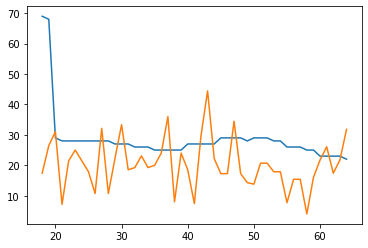

In [7]:
def get_population_and_smokers_proportion_by_age(samples):
    population_by_age = {}
    smokers_by_age = {}
    smokers_proportion_by_age = {}
    for row in samples:
        if row['age'] in population_by_age:
            population_by_age[row['age']] += 1
        else:
            population_by_age[row['age']] = 1
            smokers_by_age[row['age']] = 0
        if row['smoker'] == 'yes':
            smokers_by_age[row['age']] += 1
    for key in population_by_age:
        smokers_proportion_by_age[key] = smokers_by_age[key] / population_by_age[key]
    return sorted(population_by_age.items()), sorted(smokers_proportion_by_age.items())

population_by_age, smokers_proportion_by_age = get_population_and_smokers_proportion_by_age(samples)

plt.plot([int(x) for x,y in population_by_age], [y for x,y in population_by_age])
plt.plot([int(x) for x,y in smokers_proportion_by_age], [y*100 for x,y in smokers_proportion_by_age])
plt.show()

Looks like people in their 50s smoke less. Do smokers die at this age or have people of this generation been persuaded not to smoke? We see that the number of people at this age is really decreasing. But perhaps it makes sense to conduct a survey of people of this age and find out if they have quit smoking. If so, why? Can this be used to convince other people to quit smoking?

Now let's analyze the BMI.

In [8]:
def get_bmi_info(samples):
    
    info = {'underweight':{},
            'normalweight':{},
            'overweight':{},
            'obese':{}}
    info_details = {'population': 0, 
                    'proportion': 0, 
                    'total_charges': 0, 
                    'average_charges': 0, 
                    'smokers': 0, 
                    'smokers_proportion': 0, 
                    'children': 0, 
                    'average_children': 0,
                    'total_age': 0,
                    'average_age': 0}
    for key in info:
        info[key].update(info_details)
    
    total_population = len(samples)
    
    for row in samples:
        key = ''
        if row['bmi'] < 18.5:
            key = 'underweight'
        elif row['bmi'] < 25:
            key = 'normalweight'
        elif row['bmi'] < 30:
            key = 'overweight'
        else:
            key = 'obese'
        info[key]['population'] += 1
        info[key]['total_charges'] += row['charges']
        info[key]['children'] += row['children']
        info[key]['total_age'] += row['age']
        if row['smoker'] == 'yes':
            info[key]['smokers'] += 1
        
    for key in info:
        info[key]['average_charges'] = info[key]['total_charges'] / info[key]['population']
        info[key]['proportion'] = info[key]['population'] / total_population
        info[key]['smokers_proportion'] = info[key]['smokers'] / info[key]['population']
        info[key]['average_children'] = info[key]['children'] / info[key]['population']
        info[key]['average_age'] = info[key]['total_age'] / info[key]['population']
    return info


bmi_info = get_bmi_info(samples)
for key in bmi_info:
    print(key)
    print('proportion: {}%'.format(round(bmi_info[key]['proportion']*100, 2)))
    print('average age: {}'.format(round(bmi_info[key]['average_age'], 2)))
    print('smokers proportion: {}%'.format(round(bmi_info[key]['smokers_proportion']*100, 2)))
    print('average children: {}'.format(round(bmi_info[key]['average_children'], 2)))
    print('average charges: {}'.format(int(bmi_info[key]['average_charges'])))
    print()


underweight
proportion: 1.49%
average age: 32.35
smokers proportion: 25.0%
average children: 1.05
average charges: 8852

normalweight
proportion: 16.82%
average age: 36.73
smokers proportion: 22.22%
average children: 1.13
average charges: 10409

overweight
proportion: 28.85%
average age: 38.92
smokers proportion: 19.17%
average children: 1.06
average charges: 10987

obese
proportion: 52.84%
average age: 40.34
smokers proportion: 20.51%
average children: 1.11
average charges: 15552



So what do we see here? First of all, we see that half of the population is obese and therefore pays more. These categories are not influenced by the number of children and smoke about the same. But we see that with age, people are prone to obesity.

The following conclusions can be drawn from this short analysis:

1. People can significantly reduce their costs by quitting smoking.
2. Society has a problem with obesity. This not only worsens people's health, but also increases their insurance costs.